In [1]:
# Packages laden
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Input, Dense
from matplotlib import pyplot as plt
from pandas import DataFrame
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dropout, Activation, Flatten,TimeDistributed, BatchNormalization, LeakyReLU, Activation 
from keras.models import Model
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]
ZR_12=ZR[-100:]

# Unterteilung der Teildatensätze in Trainings-und Testdaten
ZR_100_TR, ZR_100_TE= ZR_100[0:605], ZR_100[605:len(ZR_100)]
ZR_46_TR, ZR_46_TE= ZR_46[0:250], ZR_46[250:len(ZR_46)]
ZR_12_TR, ZR_12_TE= ZR_12[0:50], ZR_12[50:len(ZR_12)]

In [5]:
# Funktion: Datensatz erstellen mit Inputs (look_back: Anzahl der verwendten Vergangenheitswerte) + Output (look_forward: 
# Vorhersagehorizont)
def timeseries_to_supervised_R(data, look_back, look_forward):
    df = DataFrame(data)
    columns = [df.shift(look_forward-1+i) for i in range(1, look_back+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    #df = df.drop(0)
    DF=df[::-1]
    df=DF[:len(df)-(look_back+look_forward-1)]
    DF=df[::-1]
    return DF

In [6]:
# Festlegung: look_back, look_forward + Anwendung der Funktion
# Inputneuronen: 12
# Vorhersagehorizont: t+1
look_back=12
look_forward=1

# Inputgröße 100%
# Trainingsdaten
ZR_100_TR_I=timeseries_to_supervised_R(ZR_100_TR, look_back, look_forward)
trainX_100, train_y_100 = ZR_100_TR_I.iloc[:, 0:-1], ZR_100_TR_I.iloc[:, -1]

# Testdaten 
ZR_100_TE_I=timeseries_to_supervised_R(ZR_100_TE, look_back, look_forward)
testX_100, test_y_100 = ZR_100_TE_I.iloc[:, 0:-1], ZR_100_TE_I.iloc[:, -1]


# Inputgröße 46%
# Trainingsdaten
ZR_46_TR_I=timeseries_to_supervised_R(ZR_46_TR, look_back, look_forward)
trainX_46, train_y_46 = ZR_46_TR_I.iloc[:, 0:-1], ZR_46_TR_I.iloc[:, -1]

# Testdaten 
ZR_46_TE_I=timeseries_to_supervised_R(ZR_46_TE, look_back, look_forward)
testX_46, test_y_46 = ZR_46_TE_I.iloc[:, 0:-1], ZR_46_TE_I.iloc[:, -1]


# Inputgröße 12%
# Trainingsdaten
ZR_12_TR_I=timeseries_to_supervised_R(ZR_12_TR, look_back, look_forward)
trainX_12, train_y_12 = ZR_12_TR_I.iloc[:, 0:-1], ZR_12_TR_I.iloc[:, -1]

# Testdaten 
ZR_12_TE_I=timeseries_to_supervised_R(ZR_12_TE, look_back, look_forward)
testX_12, test_y_12 = ZR_12_TE_I.iloc[:, 0:-1], ZR_12_TE_I.iloc[:, -1]

In [7]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [8]:
# Modell zusammenbauen
# Dateninput: 100 %
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_100, train_y_100, epochs=200, batch_size=25, verbose=2,validation_data=(testX_100, test_y_100))

Train on 593 samples, validate on 246 samples
Epoch 1/200
 - 1s - loss: 3152224588.7352 - val_loss: 132820560.3902
Epoch 2/200
 - 0s - loss: 114616296.8229 - val_loss: 82054357.0732
Epoch 3/200
 - 0s - loss: 85284018.9545 - val_loss: 57078843.9512
Epoch 4/200
 - 0s - loss: 71842059.5008 - val_loss: 56529500.5854
Epoch 5/200
 - 0s - loss: 70269345.1400 - val_loss: 56130638.1789
Epoch 6/200
 - 0s - loss: 69718284.6880 - val_loss: 55945083.3496
Epoch 7/200
 - 0s - loss: 69872815.9933 - val_loss: 55782011.7073
Epoch 8/200
 - 0s - loss: 69204847.2175 - val_loss: 55523664.2927
Epoch 9/200
 - 0s - loss: 69050647.0287 - val_loss: 55310097.3171
Epoch 10/200
 - 0s - loss: 68698174.8668 - val_loss: 55010173.0894
Epoch 11/200
 - 0s - loss: 68521752.3035 - val_loss: 55068486.2764
Epoch 12/200
 - 0s - loss: 68209334.5228 - val_loss: 54517219.3171
Epoch 13/200
 - 0s - loss: 68244106.9275 - val_loss: 54202933.3008
Epoch 14/200
 - 0s - loss: 67305618.8263 - val_loss: 53831194.6341
Epoch 15/200
 - 0s - 

Epoch 123/200
 - 0s - loss: 24128529.8617 - val_loss: 14820444.8130
Epoch 124/200
 - 0s - loss: 22608356.2968 - val_loss: 14188165.3130
Epoch 125/200
 - 0s - loss: 22423776.8347 - val_loss: 14027375.2439
Epoch 126/200
 - 0s - loss: 22488332.8229 - val_loss: 14005848.2398
Epoch 127/200
 - 0s - loss: 23385342.3390 - val_loss: 14017237.6341
Epoch 128/200
 - 0s - loss: 21933812.5278 - val_loss: 13636563.4431
Epoch 129/200
 - 0s - loss: 21780856.6863 - val_loss: 13656564.8171
Epoch 130/200
 - 0s - loss: 22476922.0000 - val_loss: 13813456.6301
Epoch 131/200
 - 0s - loss: 23282784.2766 - val_loss: 13964306.0691
Epoch 132/200
 - 0s - loss: 22630268.3322 - val_loss: 13815212.4593
Epoch 133/200
 - 0s - loss: 21741542.3828 - val_loss: 13063835.9065
Epoch 134/200
 - 0s - loss: 21231663.3457 - val_loss: 12825617.5041
Epoch 135/200
 - 0s - loss: 21235032.4840 - val_loss: 12832861.3130
Epoch 136/200
 - 0s - loss: 22155398.7251 - val_loss: 13257467.8699
Epoch 137/200
 - 0s - loss: 21079603.4368 - val_

Text(0.5,1,'Loss Curves')

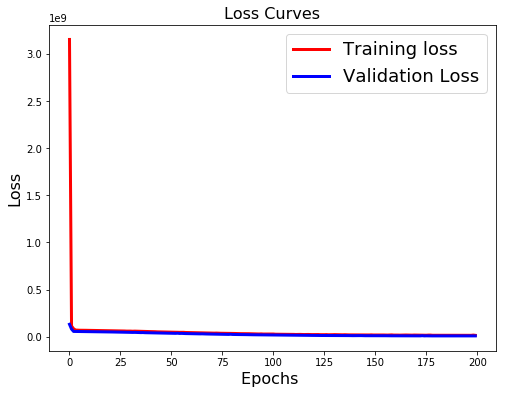

In [9]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [10]:
# Modellperformance bewerten: normalisierte Daten
trainScore = model.evaluate(trainX_100, train_y_100, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_100, test_y_100, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 16216089.10 MSE (4026.92 RMSE)
Test Score: 9761691.04 MSE (3124.37 RMSE)


In [11]:
# Vorhersagen generieren
trainPredict_100 = model.predict(trainX_100)
testPredict_100 = model.predict(testX_100)

In [12]:
# Evaluation
test_MSE=mean_squared_error(test_y_100,testPredict_100)
train_MSE=mean_squared_error(train_y_100,trainPredict_100)

print(test_MSE,train_MSE)

9761691.213116964 16216088.696343124


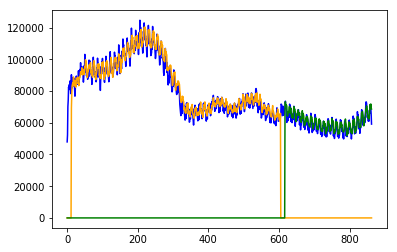

In [13]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_100))
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_100)+(look_back+look_forward-1)] = trainPredict_100

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot=testPredictPlot.reshape(len(ZR_100))
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(trainPredict_100)+2*(look_back+look_forward-1):len(ZR_100)+1] = testPredict_100
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [26]:
# Replizierbarkeit gewährleisten
np.random.seed(3)

In [27]:
# Modell zusammenbauen
# Dateninput: 46 %
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_46, train_y_46, epochs=25,batch_size=25, verbose=2,validation_data=(testX_46, test_y_46))

Train on 238 samples, validate on 138 samples
Epoch 1/25
 - 0s - loss: 2652530106.6218 - val_loss: 1336694950.0290
Epoch 2/25
 - 0s - loss: 1165200945.7479 - val_loss: 493925647.7681
Epoch 3/25
 - 0s - loss: 362013975.6639 - val_loss: 118906611.0145
Epoch 4/25
 - 0s - loss: 64681994.3697 - val_loss: 26394597.4203
Epoch 5/25
 - 0s - loss: 18765234.8992 - val_loss: 25373447.6087
Epoch 6/25
 - 0s - loss: 26839293.5840 - val_loss: 26871358.7246
Epoch 7/25
 - 0s - loss: 24387465.6681 - val_loss: 23454852.3188
Epoch 8/25
 - 0s - loss: 19453659.9328 - val_loss: 22613138.0435
Epoch 9/25
 - 0s - loss: 17846667.2227 - val_loss: 23121006.3768
Epoch 10/25
 - 0s - loss: 17951840.8929 - val_loss: 23298551.7246
Epoch 11/25
 - 0s - loss: 17977183.5378 - val_loss: 23020820.6087
Epoch 12/25
 - 0s - loss: 17846948.4664 - val_loss: 22896651.8406
Epoch 13/25
 - 0s - loss: 17815786.8235 - val_loss: 22748322.2609
Epoch 14/25
 - 0s - loss: 17842264.5672 - val_loss: 22625653.5942
Epoch 15/25
 - 0s - loss: 1782

Text(0.5,1,'Loss Curves')

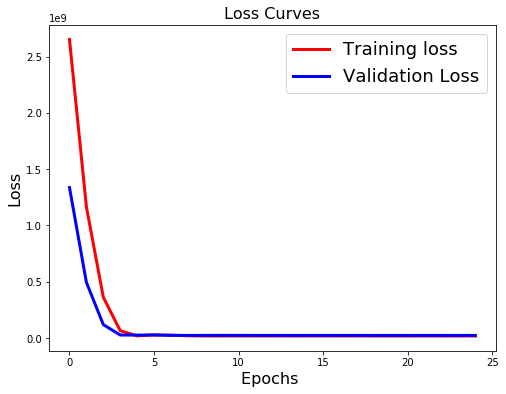

In [28]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [29]:
# Modellperformance bewerten
trainScore = model.evaluate(trainX_46, train_y_46, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_46, test_y_46, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 17690743.77 MSE (4206.04 RMSE)
Test Score: 22679821.86 MSE (4762.33 RMSE)


In [30]:
# Vorhersagen generieren
trainPredict_46 = model.predict(trainX_46)
testPredict_46 = model.predict(testX_46)

In [31]:
# Evaluation
test_MSE=mean_squared_error(test_y_46,testPredict_46)
train_MSE=mean_squared_error(train_y_46,trainPredict_46)

print(test_MSE,train_MSE)

22679821.270314865 17690743.969637


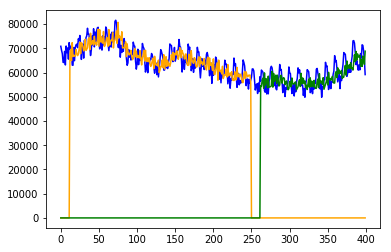

In [32]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_46))
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_46)+(look_back+look_forward-1)] = trainPredict_46

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot=testPredictPlot.reshape(len(ZR_46))
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(trainPredict_46)+2*(look_back+look_forward-1):len(ZR_46)+1] = testPredict_46
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [45]:
# Replizierbarkeit gewährleisten
np.random.seed(3)

In [46]:
# Modell zusammenbauen
# Dateninput: 12 %
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_12, train_y_12, epochs=200, verbose=2,validation_data=(testX_12, test_y_12))

Train on 38 samples, validate on 38 samples
Epoch 1/200
 - 1s - loss: 2455863659.7895 - val_loss: 2784464047.1579
Epoch 2/200
 - 0s - loss: 2181302979.3684 - val_loss: 2448712043.7895
Epoch 3/200
 - 0s - loss: 1910917813.8947 - val_loss: 2130061675.7895
Epoch 4/200
 - 0s - loss: 1657842546.5263 - val_loss: 1830986266.9474
Epoch 5/200
 - 0s - loss: 1424258701.4737 - val_loss: 1556955776.0000
Epoch 6/200
 - 0s - loss: 1210816293.0526 - val_loss: 1310164318.3158
Epoch 7/200
 - 0s - loss: 1015344060.6316 - val_loss: 1089505529.2632
Epoch 8/200
 - 0s - loss: 842789972.2105 - val_loss: 893414440.4211
Epoch 9/200
 - 0s - loss: 690919114.1053 - val_loss: 721896552.4211
Epoch 10/200
 - 0s - loss: 557750878.3158 - val_loss: 574637571.3684
Epoch 11/200
 - 0s - loss: 441471503.1579 - val_loss: 449788542.3158
Epoch 12/200
 - 0s - loss: 343864008.4211 - val_loss: 345041008.8421
Epoch 13/200
 - 0s - loss: 263814276.2105 - val_loss: 259198608.8421
Epoch 14/200
 - 0s - loss: 197533335.5789 - val_loss: 

Epoch 122/200
 - 0s - loss: 20083926.0526 - val_loss: 27601941.0526
Epoch 123/200
 - 0s - loss: 20182525.8947 - val_loss: 27703850.8421
Epoch 124/200
 - 0s - loss: 20297653.1053 - val_loss: 27725742.7368
Epoch 125/200
 - 0s - loss: 20304207.1579 - val_loss: 27639791.6842
Epoch 126/200
 - 0s - loss: 20218040.1579 - val_loss: 27503712.3158
Epoch 127/200
 - 0s - loss: 20070043.6842 - val_loss: 27294594.9474
Epoch 128/200
 - 0s - loss: 19924879.0526 - val_loss: 27097239.5789
Epoch 129/200
 - 0s - loss: 19776680.2105 - val_loss: 26987434.0000
Epoch 130/200
 - 0s - loss: 19597530.0000 - val_loss: 26930987.0526
Epoch 131/200
 - 0s - loss: 19571152.7368 - val_loss: 26928058.6316
Epoch 132/200
 - 0s - loss: 19546093.1579 - val_loss: 26971656.5263
Epoch 133/200
 - 0s - loss: 19559579.4211 - val_loss: 27037115.6842
Epoch 134/200
 - 0s - loss: 19605377.6842 - val_loss: 27101618.6316
Epoch 135/200
 - 0s - loss: 19648872.1053 - val_loss: 27132076.6316
Epoch 136/200
 - 0s - loss: 19663296.0000 - val_

Text(0.5,1,'Loss Curves')

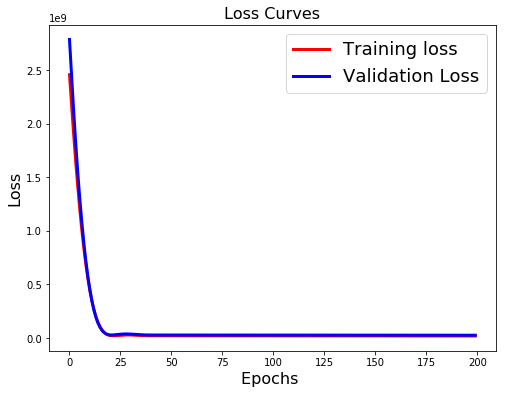

In [47]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [48]:
# Modellperformance bewerten
trainScore = model.evaluate(trainX_12, train_y_12, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_12, test_y_12, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 18788566.74 MSE (4334.58 RMSE)
Test Score: 25903337.79 MSE (5089.53 RMSE)


In [49]:
# Vorhersagen generieren
trainPredict_12 = model.predict(trainX_12)
testPredict_12 = model.predict(testX_12)

In [50]:
# Evaluation
test_MSE=mean_squared_error(test_y_12,testPredict_12)
train_MSE=mean_squared_error(train_y_12,trainPredict_12)

print(test_MSE,train_MSE)

25903337.68353914 18788566.063384205


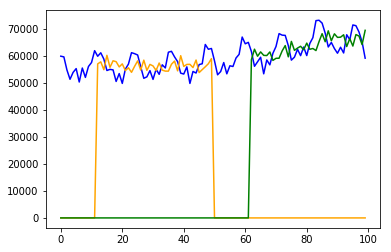

In [51]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_12)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_12))
trainPredictPlot[:]=[0]*len(ZR_12)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_12),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_12)+(look_back+look_forward-1)] = trainPredict_12

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_12)
testPredictPlot=testPredictPlot.reshape(len(ZR_12))
testPredictPlot[:]=[0]*len(ZR_12)
testPredictPlot = testPredictPlot.reshape(len(ZR_12),1)
testPredictPlot[len(trainPredict_12)+2*(look_back+look_forward-1):len(ZR_12)+1] = testPredict_12
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_12, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()